In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
file_path = r'C:\Users\usrer\ML-task\datasets\breast+cancer+wisconsin+original\cancer.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,column11
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   column1   699 non-null    int64 
 1   column2   699 non-null    int64 
 2   column3   699 non-null    int64 
 3   column4   699 non-null    int64 
 4   column5   699 non-null    int64 
 5   column6   699 non-null    int64 
 6   column7   699 non-null    object
 7   column8   699 non-null    int64 
 8   column9   699 non-null    int64 
 9   column10  699 non-null    int64 
 10  column11  699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df.columns

Index(['column1', 'column2', 'column3', 'column4', 'column5', 'column6',
       'column7', 'column8', 'column9', 'column10', 'column11'],
      dtype='object')

In [6]:
df.isin(['?']).sum()

column1      0
column2      0
column3      0
column4      0
column5      0
column6      0
column7     16
column8      0
column9      0
column10     0
column11     0
dtype: int64

In [7]:
df = df.replace('?', np.nan)
df = df.dropna()

In [8]:
X = df.iloc[:, :-1]  # All columns except last
y = df.iloc[:, -1]   # Last column as target

In [9]:
print("\nFeature DataFrame shape:", X.shape)
print("Target DataFrame shape:", y.shape)


Feature DataFrame shape: (683, 10)
Target DataFrame shape: (683,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [11]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [12]:
predictions = model.predict(X_test)

In [13]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))


Confusion Matrix:
[[130   0]
 [ 18  57]]


In [14]:
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           2       0.88      1.00      0.94       130
           4       1.00      0.76      0.86        75

    accuracy                           0.91       205
   macro avg       0.94      0.88      0.90       205
weighted avg       0.92      0.91      0.91       205



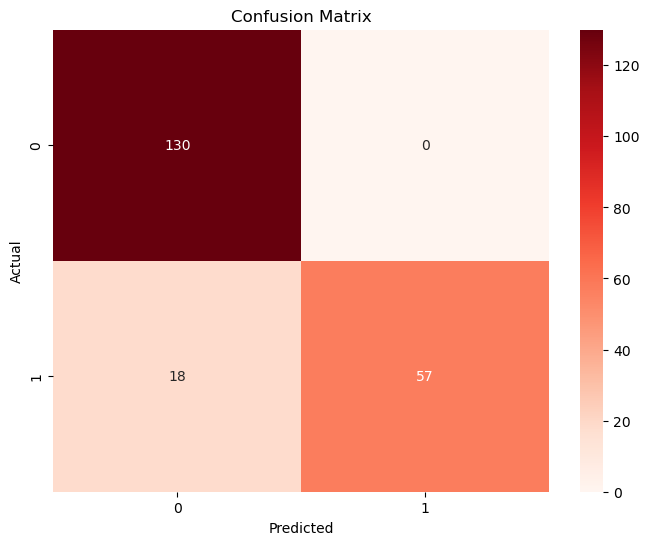

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
scores = cross_val_score(GaussianNB(), X, y, cv=10)
print("\nCross-Validation Accuracy Scores:", scores)
print("Average Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [0.95652174 0.95652174 0.95652174 0.95588235 0.76470588 0.58823529
 0.91176471 0.83823529 0.86764706 0.75      ]
Average Accuracy: 0.8546035805626598


In [6]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris 

In [7]:
data = load_iris()
X = data.data
y = data.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

In [10]:
grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [11]:
print("Best var_smoothing:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

Best var_smoothing: {'var_smoothing': 0.01519911082952933}
Best cross-validation accuracy: 0.9416666666666667


In [12]:
best_model = grid.best_estimator_
tuned_predictions = best_model.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

tuned_predictions = grid.predict(X_test)

print("\nClassification Report after tuning:")
print(classification_report(y_test, tuned_predictions))



Classification Report after tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [16]:
from sklearn.model_selection import cross_val_score

baseline_scores = cross_val_score(GaussianNB(), X, y, cv=10)
print("Baseline Avg Accuracy:", baseline_scores.mean())


Baseline Avg Accuracy: 0.9533333333333334


In [17]:
tuned_scores = cross_val_score(best_model, X, y, cv=10)
print("Tuned Avg Accuracy:", tuned_scores.mean())

Tuned Avg Accuracy: 0.96
